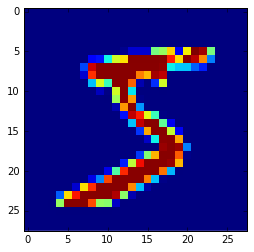

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import lmdb
caffe_root = '/home/stud/adilova/caffe/caffe-rc2/'
import sys
sys.path.insert(0, caffe_root + 'python')
import caffe

# Open lmdb dataset files
mnist_path = caffe_root + 'examples/mnist/'
dir_train = mnist_path + 'mnist_train_lmdb'
dir_test = mnist_path + 'mnist_test_lmdb'
env_train = lmdb.open(dir_train, readonly=True)
env_test = lmdb.open(dir_test, readonly=True)

# Get items of dataset in lmdb and save into a serialized string by calling its 8-byte index 
# (00000000 to 00059999 for training set,  00000000 to 00009999 for test set)
with env_train.begin() as txn:
    start_train = txn.get('00000000')
    end_train = txn.get('00059999')
with env_test.begin() as txn:
    start_test = txn.get('00000000')
    end_test = txn.get('00009999')

# datum can interpret the serialized string and be initialized by using ParseFromString method
datum_train_start = caffe.proto.caffe_pb2.Datum()
datum_train_start.ParseFromString(start_train)

# make a 28x28 array image from the datum
flat_x = np.fromstring(datum_train_start.data, dtype=np.uint8)
x = flat_x.reshape(datum_train_start.height, datum_train_start.width) 
x.shape

# check also the label of the datum
datum_train_start.label

# visualize the image
plt.rcParams['image.interpolation'] = 'none'
plt.imshow(x)